### Лабораторная работа 5

In [10]:
from IPython.display import Image
from subprocess import call

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import BaggingRegressor
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import roc_auc_score, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import warnings
from functions import c_plots, r_plots

warnings.filterwarnings('ignore')

#### Выберем нужные данные из второй и третей лабораторной

2 лабораторная:

In [11]:
sample_len = 20000
df_train = pd.read_csv('./classif/train.csv')
df_train_2 = df_train.sample(n=sample_len, replace=False, random_state=42)
df_train_2.drop("id", axis=1, inplace=True)
num_cols = ["Age", "Driving_License", "Previously_Insured", "Region_Code",
            "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
qual_cols = ["Gender", "Vehicle_Age", "Vehicle_Damage"]
res_col = "Response"
all_cols = num_cols + qual_cols

for name in qual_cols:
    df_train_2[name] = LabelEncoder().fit_transform(df_train_2[[name]])
df_train_2[all_cols] = MinMaxScaler().fit_transform(df_train_2[all_cols])

x2 = df_train_2[all_cols]
y2 = df_train_2[res_col]

df_train_2.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
46429,0.0,0.061538,1.0,0.576923,1.0,0.5,0.0,0.068835,0.932099,0.930796,0
143349,0.0,0.769231,1.0,0.538462,1.0,0.0,1.0,0.129108,0.154321,0.733564,0
196132,1.0,0.630769,1.0,0.538462,1.0,0.0,0.0,0.166912,0.154321,0.155709,0
5066,0.0,0.061538,1.0,0.076923,1.0,0.5,0.0,0.044100,0.932099,0.103806,0
211368,0.0,0.261538,1.0,0.269231,1.0,0.0,0.0,0.102890,0.932099,0.508651,0
144277,1.0,0.123077,1.0,0.076923,1.0,0.5,0.0,0.064235,0.932099,0.401384,0
102084,1.0,0.569231,1.0,0.961538,0.0,0.0,1.0,0.138536,0.759259,0.134948,0
105877,1.0,0.384615,1.0,0.153846,0.0,0.0,1.0,0.072954,0.018519,0.615917,1
175371,1.0,0.338462,1.0,0.557692,0.0,0.0,1.0,0.000000,0.154321,0.093426,1
166965,0.0,0.153846,1.0,0.538462,0.0,0.0,1.0,0.120218,0.759259,0.823529,0


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
46429,0.0,0.061538,1.0,0.576923,1.0,0.5,0.0,0.068835,0.932099,0.930796,0
143349,0.0,0.769231,1.0,0.538462,1.0,0.0,1.0,0.129108,0.154321,0.733564,0
196132,1.0,0.630769,1.0,0.538462,1.0,0.0,0.0,0.166912,0.154321,0.155709,0
5066,0.0,0.061538,1.0,0.076923,1.0,0.5,0.0,0.044100,0.932099,0.103806,0
211368,0.0,0.261538,1.0,0.269231,1.0,0.0,0.0,0.102890,0.932099,0.508651,0
144277,1.0,0.123077,1.0,0.076923,1.0,0.5,0.0,0.064235,0.932099,0.401384,0
102084,1.0,0.569231,1.0,0.961538,0.0,0.0,1.0,0.138536,0.759259,0.134948,0
105877,1.0,0.384615,1.0,0.153846,0.0,0.0,1.0,0.072954,0.018519,0.615917,1
175371,1.0,0.338462,1.0,0.557692,0.0,0.0,1.0,0.000000,0.154321,0.093426,1
166965,0.0,0.153846,1.0,0.538462,0.0,0.0,1.0,0.120218,0.759259,0.823529,0


3 лабораторная:

In [12]:
df_train_3 = pd.read_csv('./regression/train.csv')
df_train_3.drop('id', axis=1, inplace=True)
corr_matrix = df_train_3.corr()
target = 'Цена'
cors = {}
for f in df_train_3.columns:
    cors[f] = df_train_3[target].corr(df_train_3[f])
threshold = 0.29
weakly_correlated = [f for f, corr in cors.items() if abs(corr) < threshold]
df_train_3.drop(weakly_correlated, axis=1, inplace=True)

features = df_train_3.drop('Цена', axis=1)
corr_matrix = features.corr()

high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            high_corr_features.add(
                (corr_matrix.columns[i], corr_matrix.columns[j]))

price_corr = df_train_3.corr()['Цена']
to_drop = set()
for feat1, feat2 in high_corr_features:
    if abs(price_corr[feat1]) < abs(price_corr[feat2]):
        to_drop.add(feat1)
    else:
        to_drop.add(feat2)

df_train_3.drop(to_drop, axis=1, inplace=True)

x3 = df_train_3.loc[:, df_train_3.columns != 'Цена']
y3 = df_train_3['Цена']
df_train_3.head(10)

,Общая.площадь,Раздельный.санузел,Лифт,Мусоропровод,Стоматология.1000,Остановка.1000,Одежда..1000,Бар.1000,Цена
0,46.0,0,0,0,7,11,2,2,2350000.0
1,44.6,0,0,0,5,8,3,1,1799000.0
2,53.0,0,1,1,8,13,4,3,2800000.0
3,64.0,0,0,0,15,16,31,28,3970000.0
4,33.3,0,0,1,2,2,1,0,1880000.0
5,46.0,0,0,0,16,18,38,9,2400000.0
6,45.0,0,1,1,15,8,8,4,2870000.0
7,54.5,1,1,1,7,17,11,2,2700000.0
8,86.0,0,1,1,27,11,16,12,3200000.0
9,42.0,0,0,0,9,3,22,2,2560000.0


,Общая.площадь,Раздельный.санузел,Лифт,Мусоропровод,Стоматология.1000,Остановка.1000,Одежда..1000,Бар.1000,Цена
0,46.0,0,0,0,7,11,2,2,2350000.0
1,44.6,0,0,0,5,8,3,1,1799000.0
2,53.0,0,1,1,8,13,4,3,2800000.0
3,64.0,0,0,0,15,16,31,28,3970000.0
4,33.3,0,0,1,2,2,1,0,1880000.0
5,46.0,0,0,0,16,18,38,9,2400000.0
6,45.0,0,1,1,15,8,8,4,2870000.0
7,54.5,1,1,1,7,17,11,2,2700000.0
8,86.0,0,1,1,27,11,16,12,3200000.0
9,42.0,0,0,0,9,3,22,2,2560000.0


#### Построение ансамблей моделей

##### Классификация

In [13]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3,
                                                        random_state=42)

Бэггинг

In [14]:
# clfs = {"LogisticRegression": LogisticRegression,
#         "DecisionTreeClassifier": DecisionTreeClassifier,
#         "GaussianNB": GaussianNB}
# c_plots(BaggingClassifier, "BaggingClassifier", clfs, x_train2, y_train2, x_test2, y_test2)

Бустинг

In [15]:
# c_plots(AdaBoostClassifier, "AdaBoostClassifier", clfs, x_train2, y_train2, x_test2, y_test2)

Стекинг

##### Регрессия

In [16]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3,
                                                        random_state=42)

Беггинг

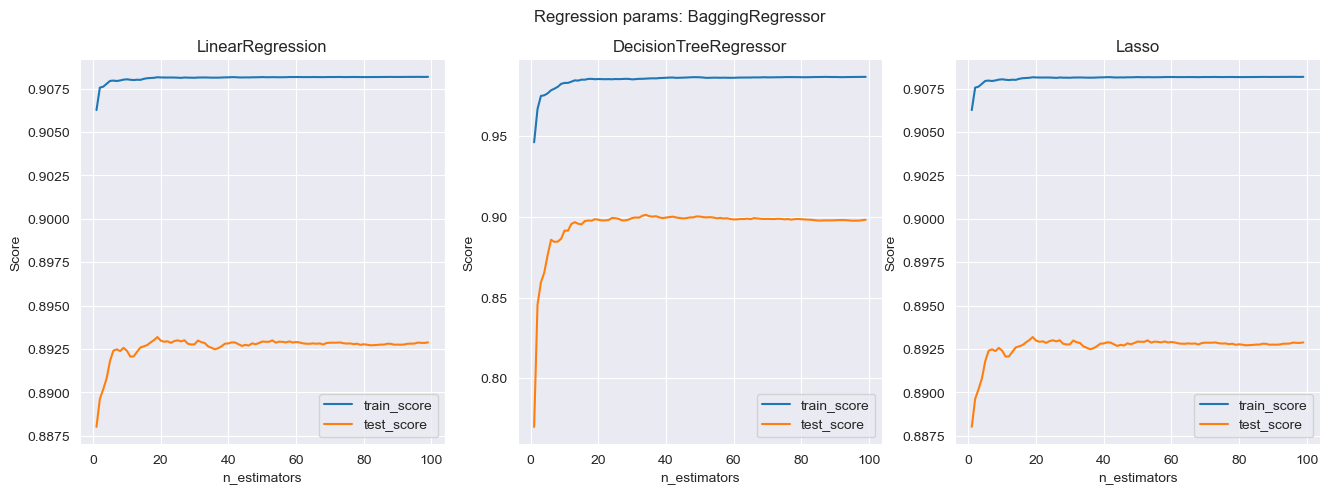

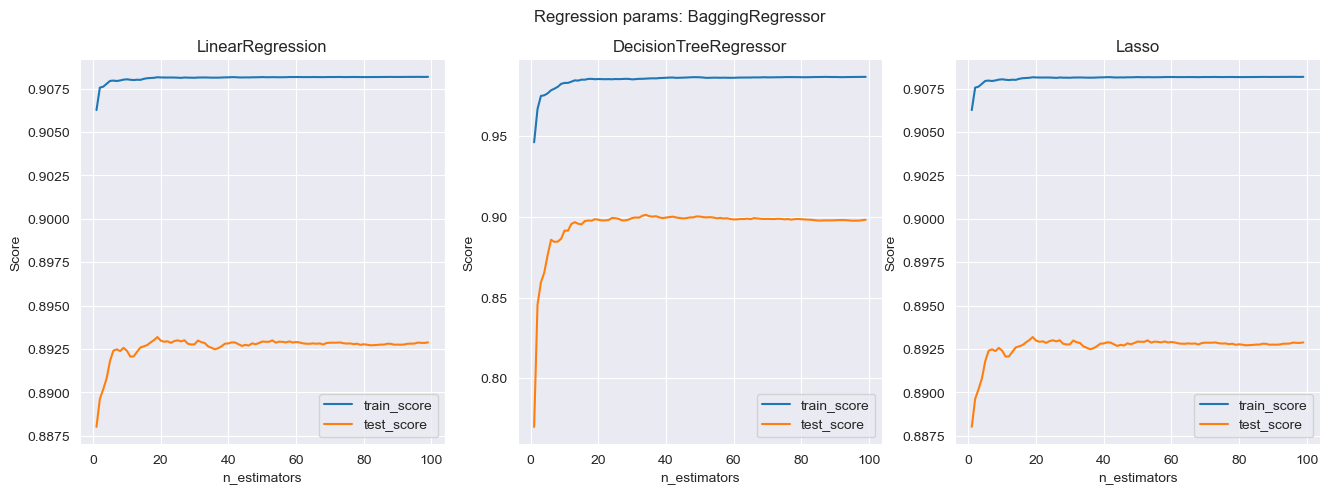

In [17]:
clfs = {"LinearRegression": LinearRegression,
        "DecisionTreeRegressor": DecisionTreeRegressor,
        "Lasso": Lasso}
r_plots(BaggingRegressor, "BaggingRegressor", clfs, x_train3, y_train3, x_test3, y_test3)

Бустинг

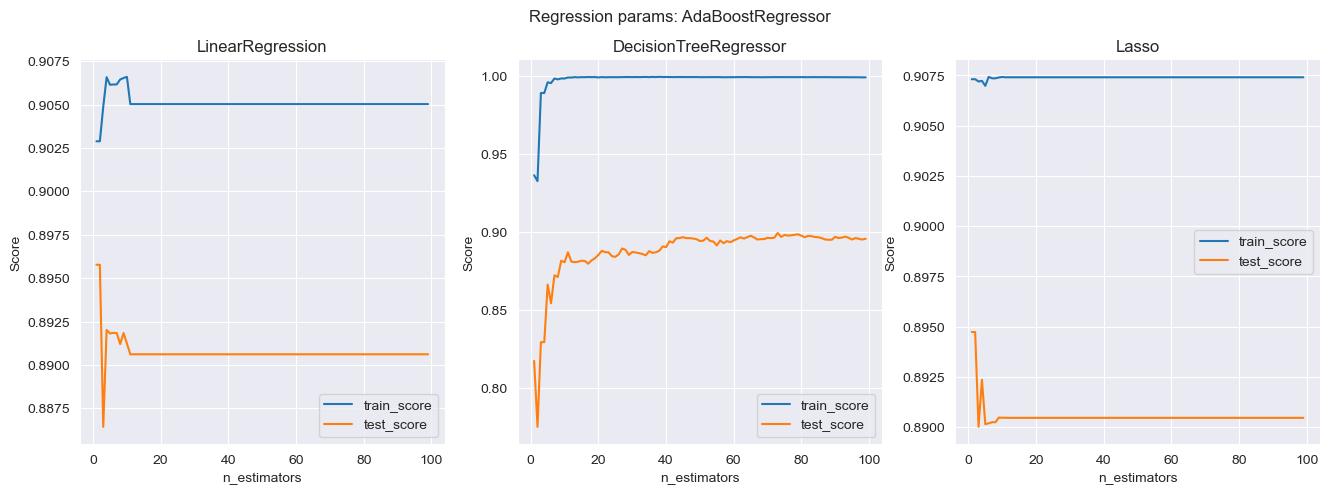

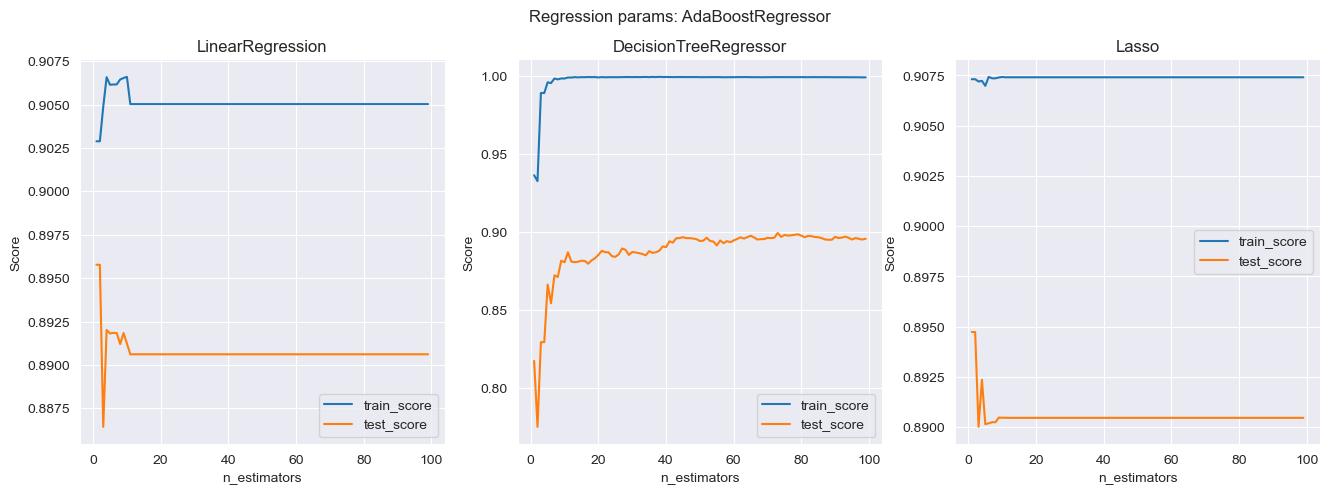

In [18]:
r_plots(AdaBoostRegressor, "AdaBoostRegressor", clfs, x_train3, y_train3, x_test3, y_test3)